# Logical RB vs Physical RB under Logical Depolarizing Channel
Use this notebook to compare logical depolartizing noise LRB against physical RB.


Saved plot (fallback): qutrit_rb_results_logical_depolarizing_noise_noise\Fidelity Curves\logical_vs_physical_rb_logical_noise_new.pdf
Saved plot (fallback): qutrit_rb_results_logical_depolarizing_noise_noise\Fidelity Curves\logicalVsPhysicalRB_logical_noise_Comparison_new.pdf
Saved plot: qutrit_rb_results_logical_depolarizing_noise_noise\Fidelity Curves\logical_vs_physical_rb_logical_noise.png


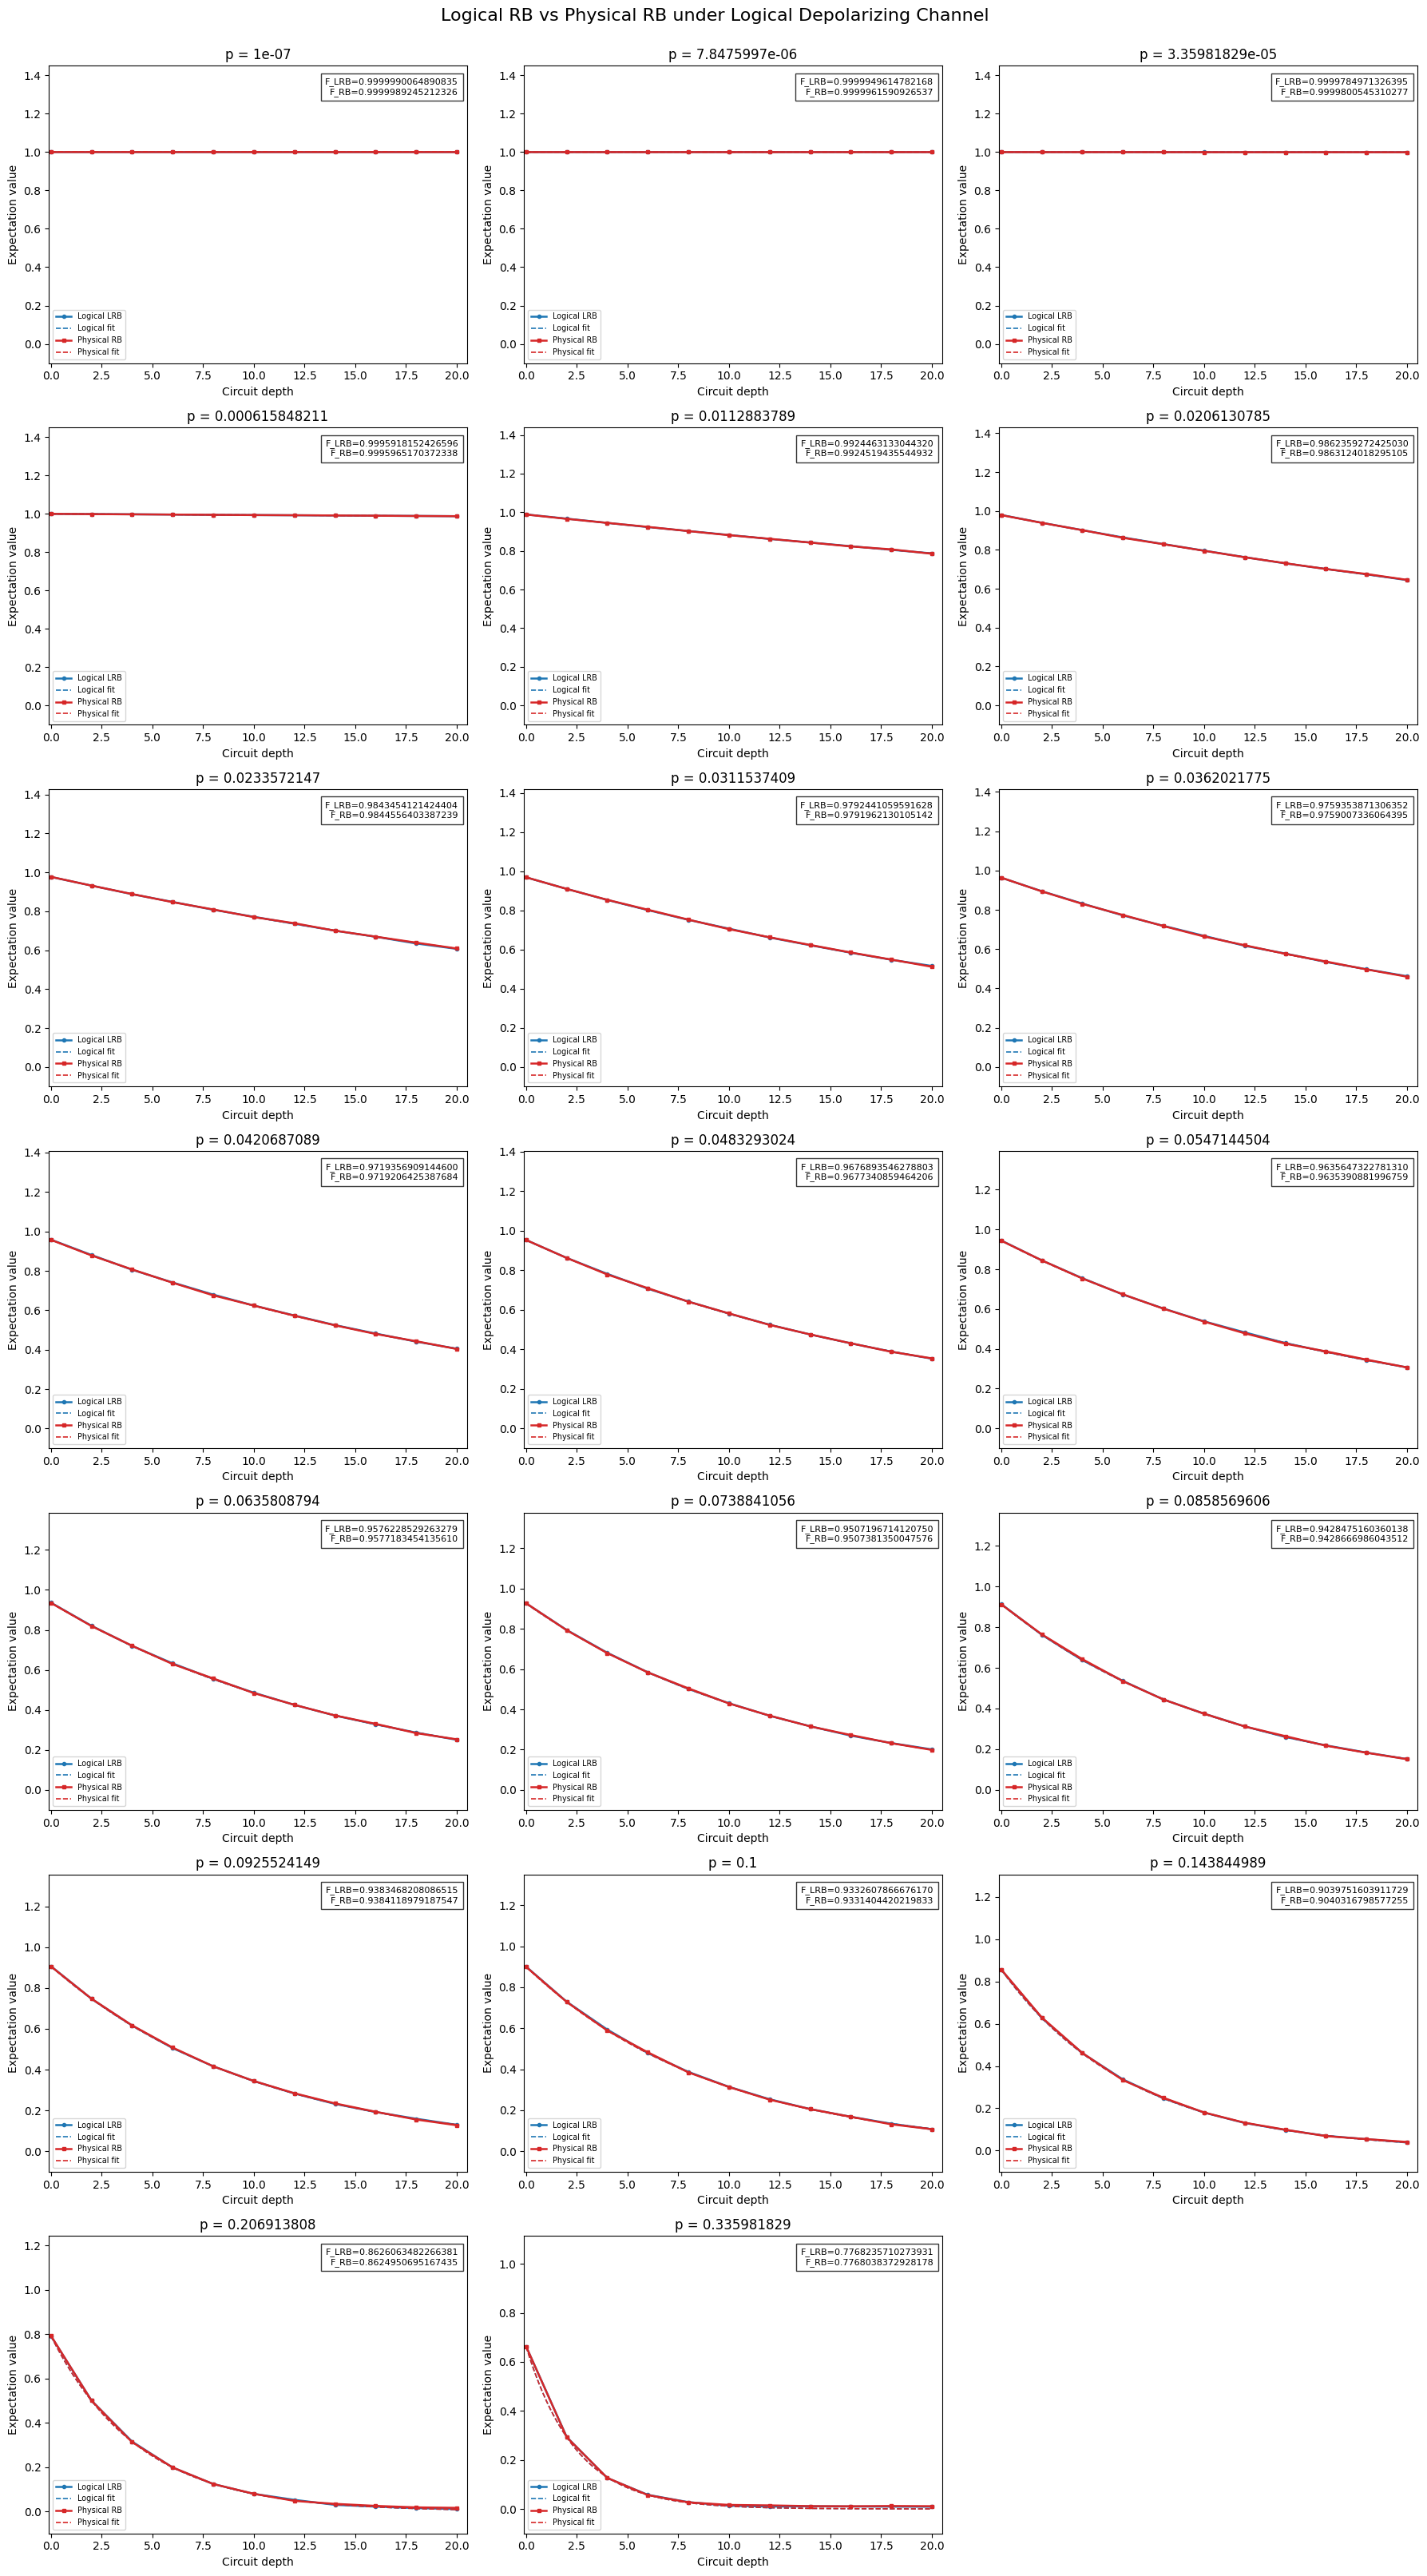

{1e-07: {'logical_fidelity': 0.9999990064890835,
  'physical_fidelity': 0.9999989245212326},
 7.8475997e-06: {'logical_fidelity': 0.9999949614782168,
  'physical_fidelity': 0.9999961590926537},
 3.35981829e-05: {'logical_fidelity': 0.9999784971326395,
  'physical_fidelity': 0.9999800545310277},
 0.000615848211: {'logical_fidelity': 0.9995918152426596,
  'physical_fidelity': 0.9995965170372338},
 0.0112883789: {'logical_fidelity': 0.992446313304432,
  'physical_fidelity': 0.9924519435544932},
 0.0206130785: {'logical_fidelity': 0.986235927242503,
  'physical_fidelity': 0.9863124018295105},
 0.0233572147: {'logical_fidelity': 0.9843454121424404,
  'physical_fidelity': 0.9844556403387239},
 0.0311537409: {'logical_fidelity': 0.9792441059591628,
  'physical_fidelity': 0.9791962130105142},
 0.0362021775: {'logical_fidelity': 0.9759353871306352,
  'physical_fidelity': 0.9759007336064395},
 0.0420687089: {'logical_fidelity': 0.97193569091446,
  'physical_fidelity': 0.9719206425387684},
 0.048

In [10]:
import inspect
import os
from importlib import reload

import qutrit_rb_plotting as qrb_plotting

qrb_plotting = reload(qrb_plotting)
LogicalRbPlotter = qrb_plotting.LogicalRbPlotter

# Choose one: "logical_noise" or "terminal_check"
experiment_key = "logical_noise"

experiment_config = {
    "logical_noise": {
        "checkpoint_dir": (
            "qutrit_rb_results_logical_depolarizing_noise_noise"
        ),
        "physical_results": (
            "qutrit_rb_results_logical_depolarizing_noise_noise/"
            "physicalRB_SimulationResults.npy"
        ),
    },
    "terminal_check": {
        "checkpoint_dir": (
            "qutrit_rb_results_terminal_check_local_noise"
        ),
        "physical_results": (
            "qutrit_rb_results_terminal_check_local_noise/"
            "physicalRB_SimulationResults.npy"
        ),
    },
}

if experiment_key not in experiment_config:
    raise ValueError(f"Unknown experiment_key: {experiment_key}")

cfg = experiment_config[experiment_key]
checkpoint_dir = cfg["checkpoint_dir"]
physical_results_path = cfg["physical_results"]

# Use None to infer p-values from logicalRB_p*.pkl files.
error_rates = None

plotter = LogicalRbPlotter(
    logical_checkpoint_dir=checkpoint_dir,
    experiment_name=experiment_key,
)

if not os.path.exists(physical_results_path):
    raise FileNotFoundError(
        "No physical RB file found at: "
        f"{physical_results_path}"
    )

overlay_params = inspect.signature(
    plotter.overlay_with_physical_rb
).parameters

overlay_kwargs = {
    "physical_results_path": physical_results_path,
    "error_rates": error_rates,
}
if "show_plot" in overlay_params:
    overlay_kwargs["show_plot"] = True

fidelity_summary = plotter.overlay_with_physical_rb(**overlay_kwargs)
fidelity_summary


## Terminal-Check Overlay (No Exponential Fits)

This plot overlays terminal-check LRB and physical RB expectation
curves using functionality from `qutrit_rb_plotting.py`. There are only 
single qutrit local depolarizing channels applied after each gate.


Saved plot: qutrit_rb_results_terminal_check_local_noise\Fidelity Curves\logical_vs_physical_rb_terminal_check.pdf
Saved plot: qutrit_rb_results_terminal_check_local_noise\Fidelity Curves\logicalVsPhysicalRB_terminal_check_Comparison.pdf
Saved plot: qutrit_rb_results_terminal_check_local_noise\Fidelity Curves\logical_vs_physical_rb_terminal_check.png


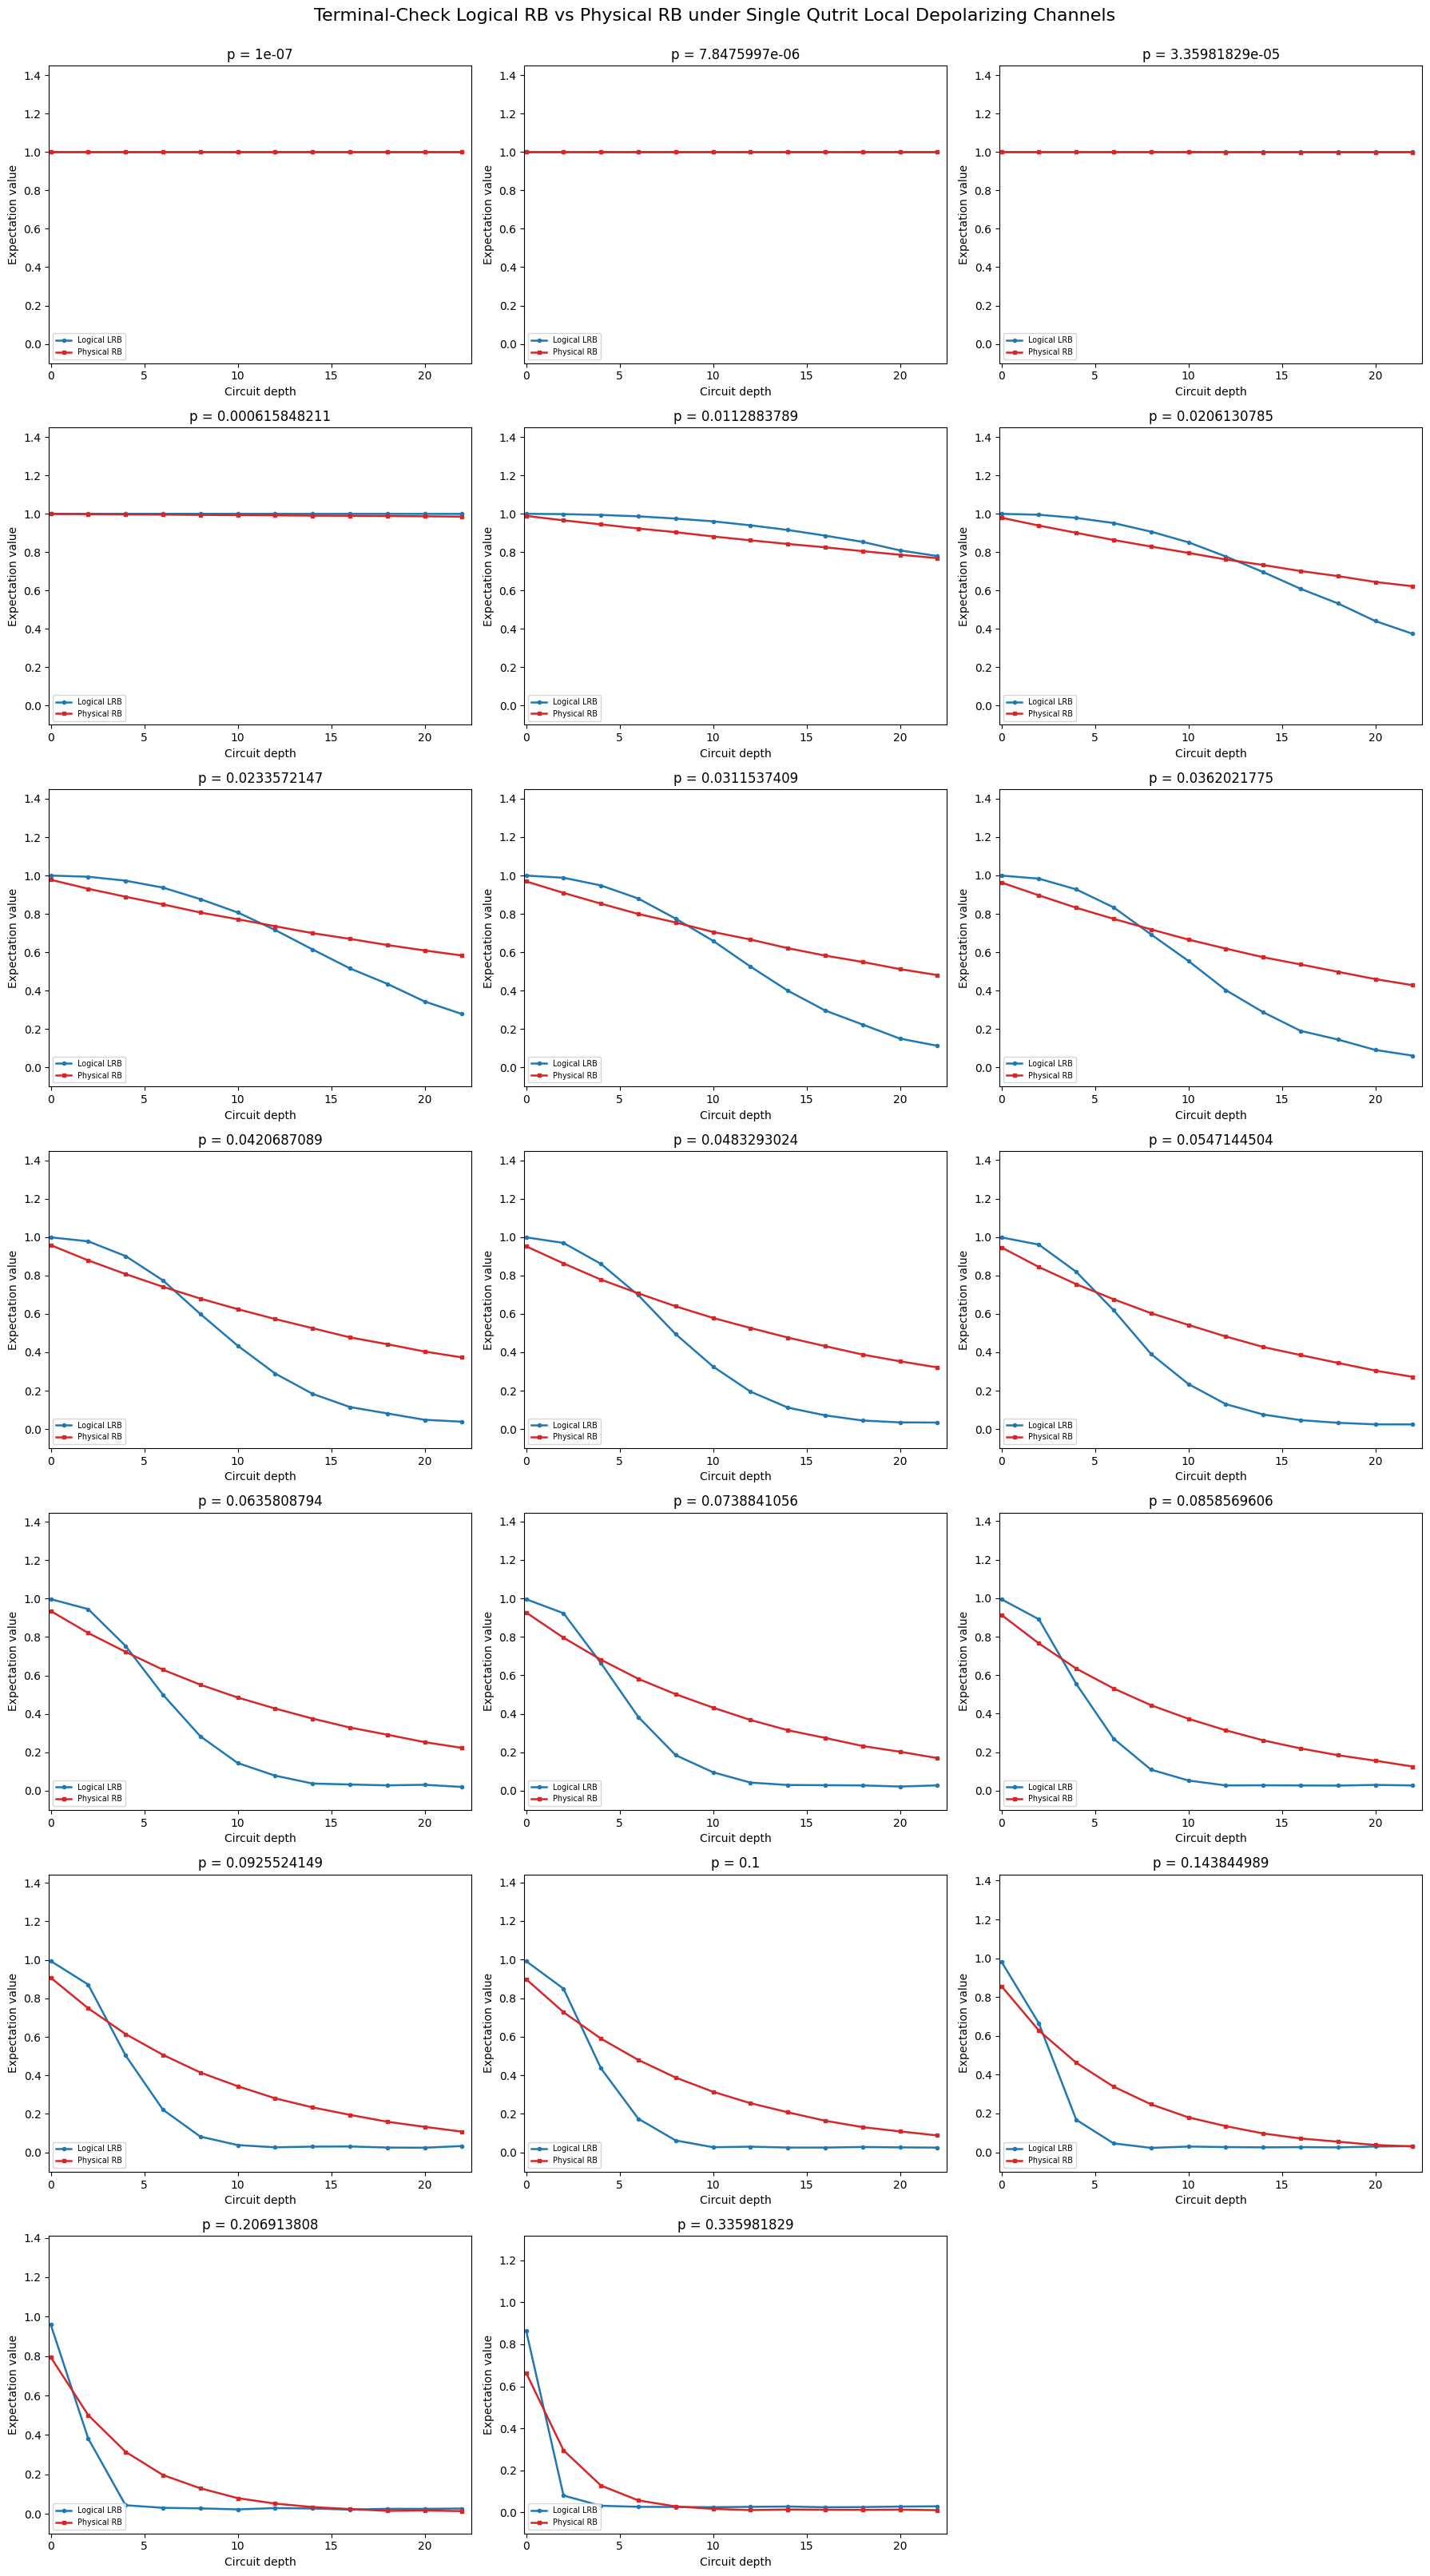

{1e-07: {'logical_fidelity': nan, 'physical_fidelity': nan},
 7.8475997e-06: {'logical_fidelity': nan, 'physical_fidelity': nan},
 3.35981829e-05: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.000615848211: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0112883789: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0206130785: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0233572147: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0311537409: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0362021775: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0420687089: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0483293024: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0547144504: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0635808794: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0738841056: {'logical_fidelity': nan, 'physical_fidelity': nan},
 0.0858569606: {'logical_fidelity': nan, 'physical

In [4]:
import os
from importlib import reload

import qutrit_rb_plotting as qrb_plotting

qrb_plotting = reload(qrb_plotting)
LogicalRbPlotter = qrb_plotting.LogicalRbPlotter

terminal_checkpoint_dir = "qutrit_rb_results_terminal_check_local_noise"
terminal_physical_results_path = (
    "qutrit_rb_results_terminal_check_local_noise/"
    "physicalRB_SimulationResults.npy"
)

if not os.path.exists(terminal_physical_results_path):
    raise FileNotFoundError(
        "No physical RB file found at: "
        f"{terminal_physical_results_path}"
    )

terminal_plotter = LogicalRbPlotter(
    logical_checkpoint_dir=terminal_checkpoint_dir,
    experiment_name="terminal_check",
)

terminal_plotter.overlay_terminal_check_with_physical_rb_no_fit(
    physical_results_path=terminal_physical_results_path,
    error_rates=None,
    show_plot=True,
    y_range=None,
)

